In [1]:
%load_ext autoreload
%autoreload 2

import clean_data
import pandas as pd
import modeling_2 as model
import numpy as np
import matplotlib.pyplot as plt
import feature_selection as fs

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
merged_df = clean_data.runAll()
merged_df_no_id = merged_df.drop('UNITID', axis=1)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
merged_df_no_id_no_inc = merged_df_no_id.copy()
inc_list = merged_df_no_id_no_inc.filter(like='INC').columns.to_list()
merged_df_no_id_no_inc = merged_df_no_id_no_inc.drop(inc_list, axis=1)
merged_df_no_id_no_inc= merged_df_no_id_no_inc.drop(columns=['PCTFLOAN','DEPENDENT', 'PCTPELL', 'PELL_EVER', 'PAR_ED_PCT_PS','DEP_STAT_PCT_IND'])

target = 'MD_EARN_WNE_P6'
n_features_to_select=20
#filtered_df_no_id_no_inc = fs.selectFeatures(merged_df_no_id_no_inc, target, n_features_to_select, fs.RFE_RF)
filtered_df_no_id_no_inc = merged_df_no_id_no_inc[['AGE_ENTRY', 'AVGFACSAL', 'FEMALE', 'FIRST_GEN', 'INEXPFTE', 'SAT_AVG',
       'TUITFTE', 'TUITIONFEE_OUT', 'UGDS', 'UGDS_ASIAN', 'UGDS_BLACK',
       'UGDS_MEN', 'UGDS_WOMEN', 'DEG_PROF', 'DEG_MED', 'DEG_BUS', 'STABBR_PR',
       'CONTROL_3.0', 'OPENADMP_1.0', 'OPENADMP_2.0', 'MD_EARN_WNE_P6',
       'Year']]

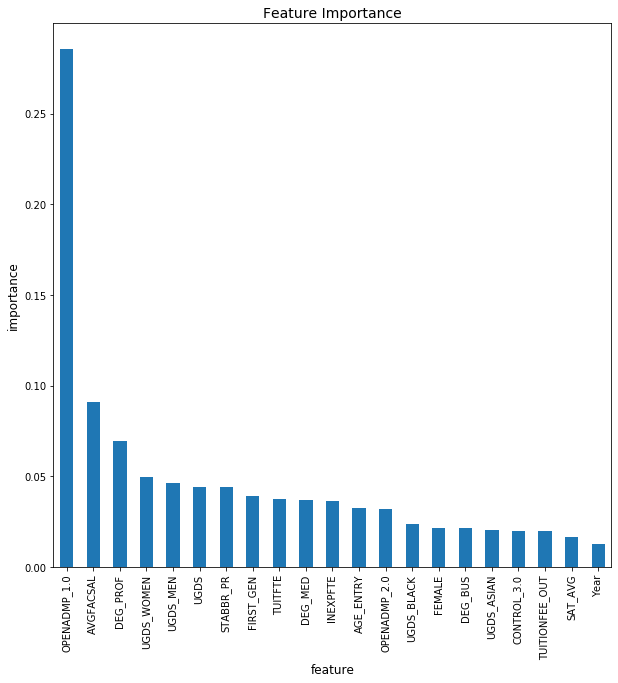

OPENADMP_1.0      0.285385
AVGFACSAL         0.091108
DEG_PROF          0.069385
UGDS_WOMEN        0.049544
UGDS_MEN          0.046446
UGDS              0.044126
STABBR_PR         0.043923
FIRST_GEN         0.039007
TUITFTE           0.037624
DEG_MED           0.036811
INEXPFTE          0.036608
AGE_ENTRY         0.032603
OPENADMP_2.0      0.031785
UGDS_BLACK        0.023569
FEMALE            0.021670
DEG_BUS           0.021260
UGDS_ASIAN        0.020248
CONTROL_3.0       0.020098
TUITIONFEE_OUT    0.019644
SAT_AVG           0.016668
Year              0.012489
dtype: float64

In [7]:
train, test = model.sampling_data(filtered_df_no_id_no_inc)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)
est = 20

(feature_importance, gcb, preds) = model.run_model(x_train, y_train, x_test, est, model.RF)
model.graph_feature_importance(feature_importance, x_train)

In [8]:
mean_squared_error(y_test, preds)

0.0025705244496463725

In [10]:
mean_absolute_error(np.exp(y_test), np.exp(preds))

993.620479878377

In [11]:
model.shap_summary_plot_for_Trees(gcb, x_train)

AssertionError: Additivity check failed in TreeExplainer! Please report this on GitHub. Consider retrying with the feature_dependence='independent' option.